# Figure - study location

This notebook shows the study location within Europe.

In [3]:
import warnings
warnings.filterwarnings('ignore')

#### Import statements

In [4]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Point, Polygon

from matplotlib import pyplot
%matplotlib inline

import numpy

#### Figure

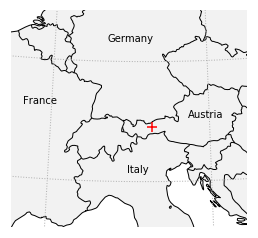

In [7]:
innsbruck_lon, innsbruck_lat = 11.3973, 47.2729

height = (9.21 / 30) * 7
width = (6.85 / 20) * 7

fig = pyplot.Figure()
fig.subplots_adjust(left=0, bottom=0, right=0.9, top=0.9, wspace=0, hspace=0)
fig.set_figheight(height)
fig.set_figwidth(width)
ax1 = pyplot.subplot(1, 1, 1, projection=cartopy.crs.AlbersEqualArea(central_latitude=47., central_longitude=11.))

# Create a feature for land from Natural Earth Data
land = cfeature.NaturalEarthFeature(
    category='physical',
    name='land',
    scale='50m')
ax1.add_feature(land, edgecolor='none', facecolor='0.95')

# Create a feature for boundaries from Natural Earth Data
boundaries = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_boundary_lines_land',
    scale='50m')
ax1.add_feature(boundaries, edgecolor='black', facecolor='none')

ax1.coastlines(resolution='50m')
ax1.set_extent([3, 17, 43, 52])
ax1.gridlines(xlocs=range(-5, 35, 10), ylocs=range(40, 60, 5), 
              crs=cartopy.crs.Geodetic(), 
              linestyle=':',
              linewidth=1)

# add study area point
ax1.scatter(innsbruck_lon, innsbruck_lat, 100, color='red', marker='+',
            transform=cartopy.crs.Geodetic(), zorder=10)

ax1.outline_patch.set_visible(False)
label_austria = ax1.text(14.75, 47.75, 'Austria', ha='center', va='center', transform=cartopy.crs.Geodetic())
label_germany = ax1.text(10, 51, 'Germany', ha='center', va='center', transform=cartopy.crs.Geodetic())
label_france = ax1.text(4.25, 48.25, 'France', ha='center', va='center', transform=cartopy.crs.Geodetic())
label_italy = ax1.text(10.5, 45.5, 'Italy', ha='center', va='center', transform=cartopy.crs.Geodetic())

In [6]:
#fig.savefig("", dpi=1200)